In [1]:
from sklearn import datasets


In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
import pandas as pd
pd.DataFrame(cancer.data, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X, y = cancer.data, cancer.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [7]:
from sklearn import svm

In [8]:
clf = svm.SVC(kernel="linear")

In [9]:
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


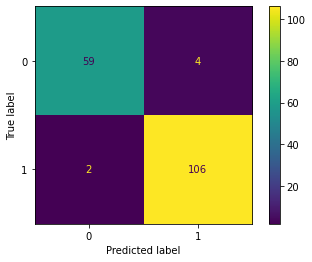

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf = svm.SVC()

In [16]:
clf.fit(X_train_scaled, y_train)

SVC()

In [17]:
y_pred = clf.predict(X_test_scaled)

In [18]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9766081871345029


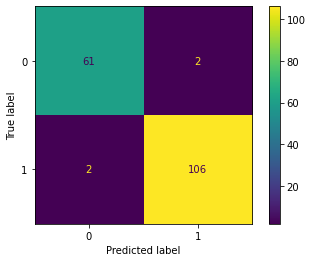

In [19]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

In [20]:
X_train.shape

(398, 30)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

In [23]:
X_train_PCA.shape

(398, 2)

In [24]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train_PCA, y_train)
y_pred = clf.predict(X_test_PCA)

In [25]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9707602339181286


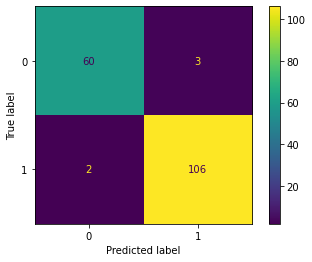

In [26]:
plot_confusion_matrix(clf, X_test_PCA, y_test)

In [27]:
import matplotlib.pyplot as plt

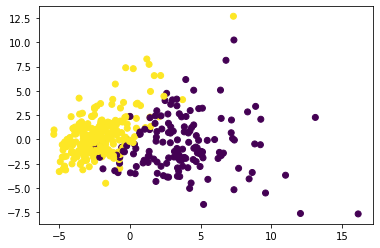

In [28]:
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c=y_train)

In [32]:
x = np.linspace(-5, 15, 30)
y = np.linspace(-5, 15, 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [36]:
xy

array([[-5.        , -5.        ],
       [-5.        , -4.31034483],
       [-5.        , -3.62068966],
       ...,
       [15.        , 13.62068966],
       [15.        , 14.31034483],
       [15.        , 15.        ]])

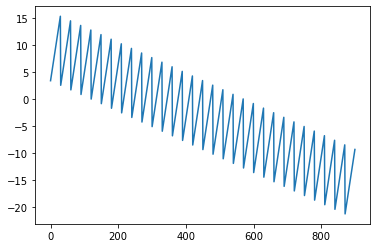

In [38]:
plt.plot(clf.decision_function(xy))

In [42]:
def plot_svc_decision_function(model, X, y, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

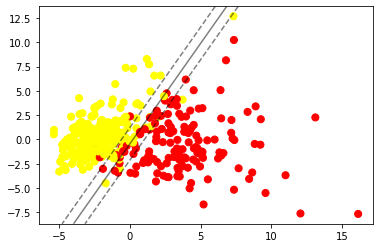

In [43]:
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf, X_train_PCA, y_train);

In [58]:
clf_radial = svm.SVC(kernel="rbf")

In [59]:
clf_radial.fit(X_train_PCA, y_train)

SVC()

In [60]:
y_pred = clf_radial.predict(X_test_PCA)

In [61]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9415204678362573


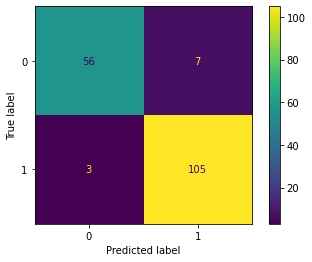

In [62]:
plot_confusion_matrix(clf_radial, X_test_PCA, y_test)

In [63]:
np.array([2, "hello"])

array(['2', 'hello'], dtype='<U21')

array(['0', '0'], dtype='<U21')